In [1]:
import gym
from gym import spaces
from gym.utils import seeding
import pybullet as p
import numpy as np
import time

import sys
sys.path.append('/Users/bibby/Code/anybullet_rl')
from common.paths import MODELS_PATH

In [2]:
physics_client = p.connect(p.DIRECT)

In [3]:
p.resetSimulation()
p.setGravity(0, 0, -9.81)
p.setTimeStep(0.02)
plane_id = p.loadURDF(MODELS_PATH + 'plane/plane.urdf')

In [4]:
quadruped_start_pos = [0, 0, 0.58]
quadruped_start_orientation = p.getQuaternionFromEuler([0, 0, 0])
quadruped_joint_angles = [0.03, 0.4, -0.8, -0.03, 0.4, -0.8, 0.03, -0.4, 0.8, -0.03, -0.4, 0.8]

In [5]:
quadruped_id = p.loadURDF(MODELS_PATH + 'anymal_boxy/anymal_boxy.urdf',
                                       quadruped_start_pos, quadruped_start_orientation,
                                       flags=p.URDF_USE_SELF_COLLISION)

In [6]:
p.setPhysicsEngineParameter(numSolverIterations=100)

In [7]:
p.getNumJoints(quadruped_id)

22

In [8]:
for j in range(p.getNumJoints(quadruped_id)):
    info = p.getJointInfo(quadruped_id, jointIndex=j)
#     print(info[2],"...",info[12],"\n")

In [10]:
# p.changeDynamics(quadruped_id, linkIndex=12)
for i in range(22):
    dyn_info = p.getDynamicsInfo(quadruped_id, linkIndex=i)
    jnt_info = p.getJointInfo(quadruped_id, jointIndex=i)

    print(str(i), "Joint: ",jnt_info[12],"    Mass: ",dyn_info[0])
# dyn_info = p.getDynamicsInfo(quadruped_id, linkIndex=2)
# print(dyn_info)
# jnt_info = p.getJointInfo(quadruped_id, jointIndex=2)
# print(jnt_info)

0 Joint:  b'base_inertia'     Mass:  16.793507758
1 Joint:  b'LF_HIP'     Mass:  1.42462064
2 Joint:  b'LF_THIGH'     Mass:  1.634976467
3 Joint:  b'LF_SHANK'     Mass:  0.207204302
4 Joint:  b'LF_ADAPTER'     Mass:  0.140170767
5 Joint:  b'LF_FOOT'     Mass:  1.0
6 Joint:  b'RF_HIP'     Mass:  1.42462064
7 Joint:  b'RF_THIGH'     Mass:  1.634976467
8 Joint:  b'RF_SHANK'     Mass:  0.207204302
9 Joint:  b'RF_ADAPTER'     Mass:  0.140170767
10 Joint:  b'RF_FOOT'     Mass:  1.0
11 Joint:  b'LH_HIP'     Mass:  1.42462064
12 Joint:  b'LH_THIGH'     Mass:  1.634976467
13 Joint:  b'LH_SHANK'     Mass:  0.207204302
14 Joint:  b'LH_ADAPTER'     Mass:  0.140170767
15 Joint:  b'LH_FOOT'     Mass:  1.0
16 Joint:  b'RH_HIP'     Mass:  1.42462064
17 Joint:  b'RH_THIGH'     Mass:  1.634976467
18 Joint:  b'RH_SHANK'     Mass:  0.207204302
19 Joint:  b'RH_ADAPTER'     Mass:  0.140170767
20 Joint:  b'RH_FOOT'     Mass:  1.0
21 Joint:  b'imu_link'     Mass:  0.05


5 Joint:  b'LF_FOOT

10 Joint:  b'RF_FOOT

15 Joint:  b'LH_FOOT

20 Joint:  b'RH_FOOT

In [17]:
quadruped_joint_ids = []
active_joint = 0
for j in range(p.getNumJoints(quadruped_id)):
    p.changeDynamics(quadruped_id, j, linearDamping=0, angularDamping=0)
    info = p.getJointInfo(quadruped_id, jointIndex=j)
    joint_type = info[2]
    if joint_type == p.JOINT_PRISMATIC or joint_type == p.JOINT_REVOLUTE:
        quadruped_joint_ids.append(j)
        p.resetJointState(quadruped_id, j, quadruped_joint_angles[active_joint])
        active_joint+=1

In [34]:
for i in quadruped_joint_ids:
#     dyn_info = p.getJointState(quadruped_id, jointIndex=i)
    jnt_info = p.getJointInfo(quadruped_id, jointIndex=i)[12]
#     jnt_info = p.getJointState(quadruped_id, i)[0]
    print(jnt_info)
len(quadruped_joint_ids)

b'LF_HIP'
b'LF_THIGH'
b'LF_SHANK'
b'RF_HIP'
b'RF_THIGH'
b'RF_SHANK'
b'LH_HIP'
b'LH_THIGH'
b'LH_SHANK'
b'RH_HIP'
b'RH_THIGH'
b'RH_SHANK'


12

Inspecting the joint angles
=====


In [40]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


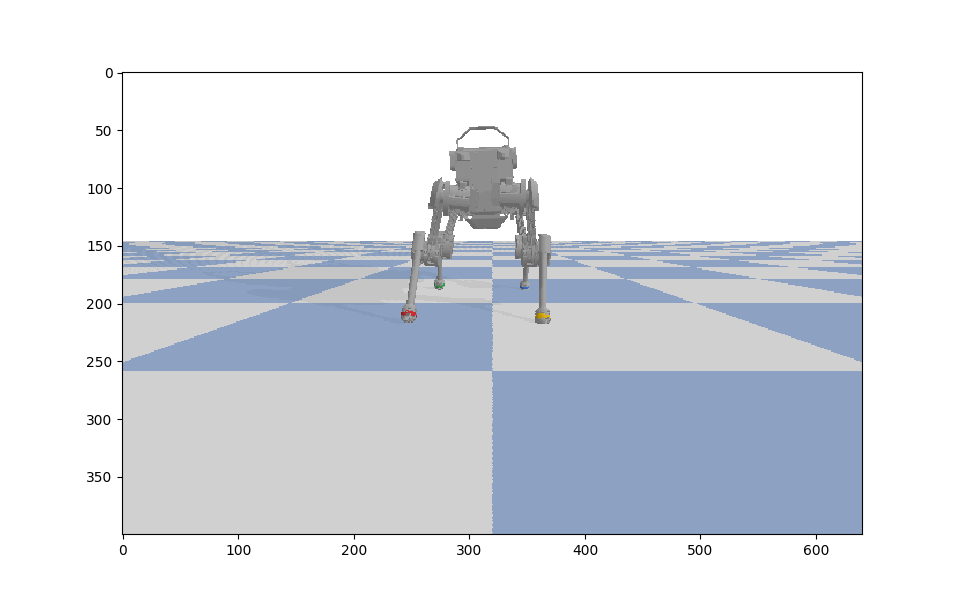

In [41]:
%matplotlib notebook
camTargetPos = [0, 0, 0]
cameraUp = [0, 0, 1]
cameraPos = [1, 1, 1]

pitch = -10.0
roll = 0
yaw = 45
upAxisIndex = 2
# camDistance = 4
camDistance = 2
pixelWidth = 640
pixelHeight = 400
nearPlane = 0.01
farPlane = 100

fov = 60

# For plotting multiple frames
img = np.random.rand(400, 640)
fig, ax = plt.subplots(figsize=(9.6, 6))
image = ax.imshow(img, interpolation='none', animated=True, label="blah")

# for yaw in range(0, 360, 10):
#     p.stepSimulation()
#     viewMatrix = p.computeViewMatrixFromYawPitchRoll(camTargetPos, camDistance, yaw, pitch,
#                                                                 roll, upAxisIndex) 
#     aspect = pixelWidth / pixelHeight
#     projectionMatrix = p.computeProjectionMatrixFOV(fov, aspect, nearPlane, farPlane)
#     img_arr = p.getCameraImage(pixelWidth,
#                               pixelHeight,
#                               viewMatrix,
#                               projectionMatrix,
#                               shadow=1,
#                               lightDirection=[1, 1, 1],
#                               renderer=p.ER_BULLET_HARDWARE_OPENGL)
[0.03, 0.4, -0.8, -0.03, 0.4, -0.8, 0.03, -0.4, 0.8, -0.03, -0.4, 0.8]
# hip,thig,shank, hip, , thigh,sha, hip, thigh, sha, hip  , thig, shan
# all at once
actions_low = np.asarray([-0.09, -0.2, -1.4, -0.15, -0.2, -1.4, -0.09, -1.0, 0.2, -0.15, -1.0, 0.2])
actions_high = np.asarray([0.15, 1.0, -0.2, 0.09, 1.0, -0.2, 0.15, 0.2, 1.4, 0.09, 0.2, 1.4])
interp_angles = np.linspace(actions_high, actions_low, 25)

# hips only
actions_low = np.asarray([-0.09, 0.4, -0.8, -0.15, 0.4, -0.8, -0.09, -0.4, 0.8, -0.15, -0.4, 0.8])
actions_high = np.asarray([0.15, 0.4, -0.8, 0.09, 0.4, -0.8, 0.15, -0.4, 0.8, 0.09, -0.4, 0.8])
interp_angles_hips = np.linspace(actions_high, actions_low, 25)

# thigh only
actions_low_thigh = np.asarray([0.03, -0.2, -0.8, -0.03, -0.2, -0.8, 0.03, -1.0, 0.8, -0.03, -1.0, 0.8])
actions_high = np.asarray([0.03, 1.0, -0.8, -0.03, 1.0, -0.8, 0.03, 0.2, 0.8, -0.03, 0.2, 0.8])
interp_angles_thigh = np.linspace(actions_high, actions_low, 25)

# shank only
actions_low = np.asarray([0.03, 0.4, -1.4, -0.03, 0.4, -1.4, 0.03, -0.4, 0.2, -0.03, -0.4, 0.2])
actions_high = np.asarray([0.03, 0.4, -0.2, -0.03, 0.4, -0.2, 0.03, -0.4, 1.4, -0.03, -0.4, 1.4])
interp_angles_shank = np.linspace(actions_high, actions_low, 25)

interp_angles = interp_angles_hips
yaw = 90
for joint_angles in interp_angles:
    for i, j in enumerate(quadruped_joint_ids):
        p.resetJointState(quadruped_id, j, joint_angles[i])
        
    p.stepSimulation()
    viewMatrix = p.computeViewMatrixFromYawPitchRoll(camTargetPos, camDistance, yaw, pitch,
                                                                roll, upAxisIndex) 
    aspect = pixelWidth / pixelHeight
    projectionMatrix = p.computeProjectionMatrixFOV(fov, aspect, nearPlane, farPlane)
    img_arr = p.getCameraImage(pixelWidth,
                              pixelHeight,
                              viewMatrix,
                              projectionMatrix,
                              shadow=1,
                              lightDirection=[1, 1, 1],
                              renderer=p.ER_BULLET_HARDWARE_OPENGL)
    
    
    
    w = img_arr[0]  #width of the image, in pixels
    h = img_arr[1]  #height of the image, in pixels
    rgb = img_arr[2]  #color data RGB
    dep = img_arr[3]  #depth data
    np_img_arr = np.reshape(rgb, (h, w, 4))
    np_img_arr = np_img_arr * (1. / 255.)
    image.set_data(np_img_arr)
    fig.canvas.draw()
    plt.pause(0.005)

# for plotting single frames
# fig, ax = plt.subplots(figsize=(6.4, 4))
# plt.cla()
# p.stepSimulation()
# viewMatrix = p.computeViewMatrixFromYawPitchRoll(camTargetPos, camDistance, yaw, pitch,
#                                                             roll, upAxisIndex) 
# aspect = pixelWidth / pixelHeight
# projectionMatrix = p.computeProjectionMatrixFOV(fov, aspect, nearPlane, farPlane)
# img_arr = p.getCameraImage(pixelWidth,
#                           pixelHeight,
#                           viewMatrix,
#                           projectionMatrix,
#                           shadow=1,
#                           lightDirection=[1, 1, 1],
#                           renderer=p.ER_BULLET_HARDWARE_OPENGL)
# w = img_arr[0]  #width of the image, in pixels
# h = img_arr[1]  #height of the image, in pixels
# rgb = img_arr[2]  #color data RGB
# dep = img_arr[3]  #depth data
# np_img_arr = np.reshape(rgb, (h, w, 4))
# np_img_arr = np_img_arr * (1. / 255.)
# image = ax.imshow(np_img_arr)
plt.show()
    



In [65]:
LF_stream = []
for foot_index in [5,10,15,20]:
for foot_index in [5]:
    contact = p.getContactPoints(quadruped_id, plane_id, linkIndexA=foot_index)
    if contact == ():
        LF_stream.append(0)
    else:
        LF_stream.append(1)

10
20


In [78]:
feet_ids = {'LF':5, 'RF':10, 'LH':15, 'RH':20}
for foot, idx in feet_ids.items():
    foot=5

{'LF': 5, 'RF': 10, 'LH': 15, 'RH': 20}

In [76]:
LF_stream = np.around(np.random.rand(100))
LF_stream

array([1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.])

In [74]:
plt.plot(LF_stream)
plt.show()

In [20]:
quadruped_pos, quadruped_orientation = p.getBasePositionAndOrientation(quadruped_id)

In [203]:
quadruped_pos, quadruped_orientation = p.getBasePositionAndOrientation(quadruped_id)
quadruped_orientation = p.getEulerFromQuaternion(quadruped_orientation)
quadruped_linear_vel, quadruped_angular_vel = p.getBaseVelocity(quadruped_id)

joint_states = []
for j in quadruped_joint_ids:
    joint_states.append(p.getJointState(quadruped_id, j)[0])
    joint_states.append(p.getJointState(quadruped_id, j)[1])

obs = np.concatenate([quadruped_pos, quadruped_orientation,
                       quadruped_linear_vel, quadruped_angular_vel, joint_states])



Investigating early termination: tuning conditions
====

In [210]:
quadruped_pos, quadruped_orientation = p.getBasePositionAndOrientation(quadruped_id)
quadruped_linear_vel, _ = p.getBaseVelocity(quadruped_id)
vel_x = quadruped_linear_vel[0]
quadruped_orientation = p.getEulerFromQuaternion(quadruped_orientation)

done = bool(quadruped_pos[2] < 0.3)
done = bool(done or np.abs(quadruped_orientation[0]) >= np.pi / 4)
done = bool(done or np.abs(quadruped_orientation[1]) >= np.pi / 4)
done = bool(done or np.abs(quadruped_orientation[2]) >= np.pi / 4)
done = bool(done or vel_x > 1)

In [212]:
quadruped_orientation

(9.032228539354029e-08, -1.5013234148155546e-05, 1.4824866351999367e-05)

In [213]:
help(p.setTimeStep)

Help on built-in function setTimeStep in module pybullet:

setTimeStep(...)
    setTimeStep(timestep, physicsClientId=0)
    Set the amount of time to proceed at each call to stepSimulation. (unit is seconds, typically range is 0.01 or 0.001)



In [229]:
p.getPhysicsEngineParameters()['fixedTimeStep']

0.02

In [230]:
p.resetSimulation

<function pybullet.resetSimulation>

In [231]:
p.getPhysicsEngineParameters()['fixedTimeStep']

0.02

0.10000000000000009